In [95]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import explained_variance_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [96]:
df = pd.read_csv('../mydata/AB_NYC_2019.csv')
df.head()
df = df.dropna().reset_index(drop=True)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

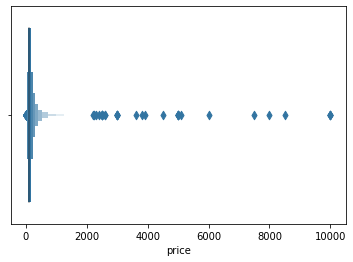

In [97]:
sns.boxenplot(x=df['price'])

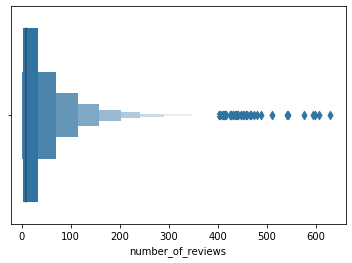

In [98]:
sns.boxenplot(x=df['number_of_reviews'])

In [99]:
from sklearn.cluster import KMeans
# 'room_type' and neighbourhood_group can easilty be used post dummy-coding

cluster_ready = df[['latitude', 'longitude','minimum_nights', 'number_of_reviews',
                    'calculated_host_listings_count','availability_365']]

model = KMeans(n_clusters=3)
clusters = model.fit_predict(cluster_ready)

df['cluster'] = clusters
df.cluster.value_counts()

0    22488
1     9075
2     7258
Name: cluster, dtype: int64

In [100]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,cluster
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2


In [101]:
X = pd.get_dummies(df[['neighbourhood_group','neighbourhood','room_type','cluster']])
y = df['price']
X.head()

,cluster,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## A good analysis of the usage of DecisionTreeClassifiers

In [103]:
X = pd.get_dummies(df[['neighbourhood_group','neighbourhood','room_type','cluster']])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

def try_depth(min=1,max=10):
    for max_depth in range(min, max+1):
        tree_clf = DecisionTreeRegressor(max_depth=max_depth)
        tree_clf.fit(X_train, y_train)
        y_pred = tree_clf.predict(X_test)
        print(f'Depth: {max_depth}, Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}, Explained Variance Score:, {explained_variance_score(y_test, y_pred, multioutput="uniform_average")}')

try_depth(100, 500)

Depth: 100, Mean Absolute Error: 56.431611709059794, Explained Variance Score:, 0.141202747803561
Depth: 101, Mean Absolute Error: 56.432137050142124, Explained Variance Score:, 0.1412077264392373
Depth: 102, Mean Absolute Error: 56.43279395744745, Explained Variance Score:, 0.14120028571479426
Depth: 103, Mean Absolute Error: 56.43144563525843, Explained Variance Score:, 0.14120580353237266
Depth: 104, Mean Absolute Error: 56.43184018454546, Explained Variance Score:, 0.1412040823327282
Depth: 105, Mean Absolute Error: 56.43010747531435, Explained Variance Score:, 0.14120880166858019
Depth: 106, Mean Absolute Error: 56.43248569591575, Explained Variance Score:, 0.14120735068087864
Depth: 107, Mean Absolute Error: 56.431097587012765, Explained Variance Score:, 0.14120339177224694
Depth: 108, Mean Absolute Error: 56.43029469812231, Explained Variance Score:, 0.1412069920799076
Depth: 109, Mean Absolute Error: 56.43240471908332, Explained Variance Score:, 0.1411996424915165


KeyboardInterrupt: 

In [91]:
param_grid = {'max_depth': list(range(100,500)),
              'min_samples_split': [0.01,0.005,0.001], 'min_samples_leaf':[0.01,0.005,0.001]}
clf = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [100, 101, 102, 103, 104, 105, 106, 107,
                                       108, 109, 110, 111, 112, 113, 114, 115,
                                       116

In [93]:
clf.best_params_

{'max_depth': 100, 'min_samples_leaf': 0.001, 'min_samples_split': 0.01}

In [102]:
clf = DecisionTreeRegressor(random_state=0,max_depth=100,min_samples_leaf=0.001,min_samples_split=0.01)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [107]:
ccp_alphas

array([0.00000000e+00, 1.77975621e-05, 5.15545574e-05, 6.95106351e-03,
       7.23735308e-03, 1.27021094e-02, 1.49086417e-02, 1.89271305e-02,
       2.46735552e-02, 2.56745602e-02, 2.72459575e-02, 2.85682810e-02,
       2.91421084e-02, 3.06638216e-02, 3.26209378e-02, 3.66001104e-02,
       3.93726354e-02, 4.98372385e-02, 6.55841034e-02, 6.65620741e-02,
       7.32048426e-02, 7.75166781e-02, 8.54852138e-02, 1.03224897e-01,
       1.05522407e-01, 1.06966056e-01, 1.11321013e-01, 1.11544206e-01,
       1.15588436e-01, 1.27074381e-01, 1.31861378e-01, 1.39969866e-01,
       1.45178467e-01, 1.51924247e-01, 1.86698087e-01, 1.92476239e-01,
       1.99979621e-01, 2.14066567e-01, 2.40831804e-01, 2.41057762e-01,
       2.44066130e-01, 2.54627711e-01, 2.85022993e-01, 3.01571772e-01,
       3.04358170e-01, 3.16760969e-01, 3.28988319e-01, 3.35988427e-01,
       3.57064430e-01, 4.28380551e-01, 4.30209843e-01, 4.39322905e-01,
       4.49340206e-01, 4.57333675e-01, 4.84446057e-01, 4.91719649e-01,
      

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

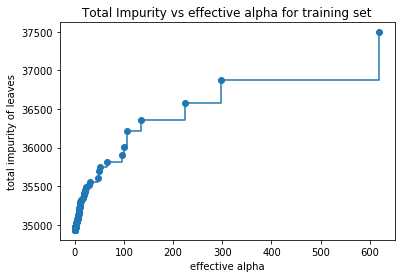

In [106]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [117]:
ccp_alphas2 = []
for ccp_alpha in ccp_alphas:
    if ccp_alpha < 1:
        ccp_alphas2.append(ccp_alpha)

clfs = []
for ccp_alpha in ccp_alphas2:
    clf = DecisionTreeRegressor(random_state=0,max_depth=100,min_samples_leaf=0.001,min_samples_split=0.01, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas2[-1]))

Number of nodes in the last tree is: 215 with ccp_alpha: 0.981014419983012


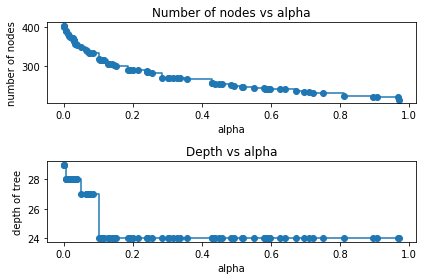

In [118]:
clfs = clfs[:-1]
ccp_alphas2 = ccp_alphas2[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas2, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas2, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

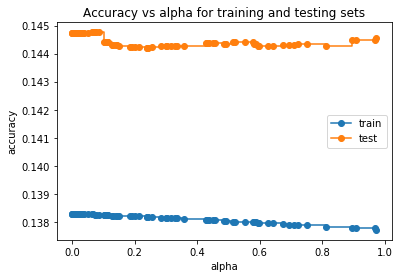

In [119]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas2, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas2, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()